In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import imutils
import random

In [2]:
!unzip -q "dataset.zip"

#### Đa dạng kích thước biển số

In [3]:
def add_border(image_path, output_path, low, high):
    """
    low: kích thước biên nhỏ nhất (pixel)
    high: kích thước biên lớn nhất (pixel)
    """
    top = random.randint(low, high)
    bottom = random.randint(low, high)
    left = random.randint(low, high)
    right = random.randint(low, high)

    image = cv2.imread(image_path)
    original_height, original_width = image.shape[0], image.shape[1]

    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_REPLICATE)

    image = cv2.resize(image, (original_width, original_height))
    cv2.imwrite(output_path, image)

In [4]:
original_image = cv2.imread('dataset/0000_02187_b.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
add_border(image_path='dataset/0000_02187_b.jpg', output_path='dataset/aug_1.jpg', low=100, high=400)
aug_image = cv2.imread('dataset/aug_1.jpg')
aug_image = cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB)

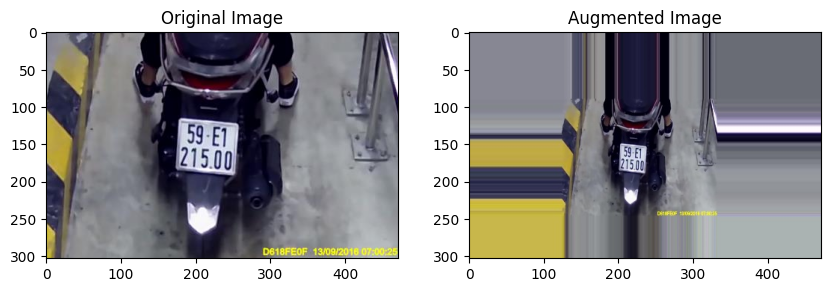

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(aug_image)
axes[1].set_title('Augmented Image')
plt.show()

In [6]:
def random_crop(image_path, output_path):
    image = cv2.imread(image_path)

    original_height, original_width = image.shape[0], image.shape[1]
    x_center, y_center = original_width//2, original_height//2

    x_left = random.randint(0, x_center//2)
    x_right = random.randint(original_width - x_center//2, original_width)

    y_top = random.randint(0, y_center//2)
    y_bottom = random.randint(original_height - y_center//2, original_height)

    cropped_image = image[y_top:y_bottom, x_left:x_right]
    cropped_image = cv2.resize(cropped_image, (original_width, original_height))

    cv2.imwrite(output_path, cropped_image)

In [7]:
original_image = cv2.imread('dataset/0000_00532_b.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
random_crop(image_path='dataset/0000_00532_b.jpg', output_path='dataset/aug_3.jpg')
aug_image = cv2.imread('dataset/aug_3.jpg')
aug_image = cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB)

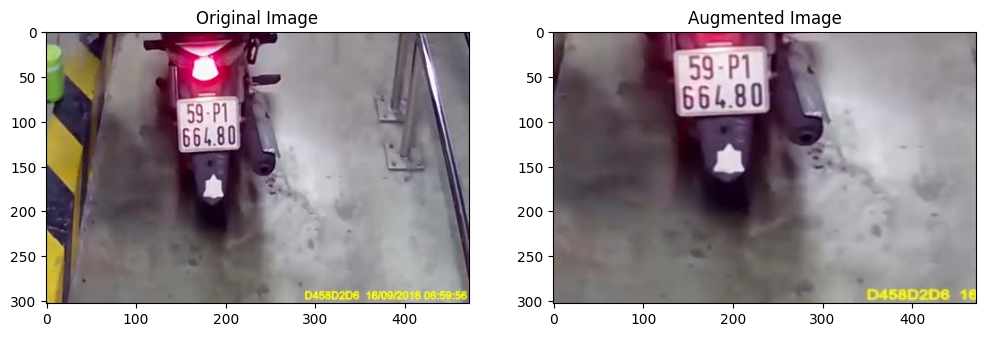

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(aug_image)
axes[1].set_title('Augmented Image')
plt.show()

#### Thay đổi độ sáng của ảnh

In [9]:
def change_brightness(image_path, output_path, range_value):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)  # Hue, Saturation, Value
    value = random.randint(-range_value, range_value)
    v = cv2.add(v, value)
    v[v > 255] = 255
    v[v < 0]  = 0

    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

    cv2.imwrite(output_path, image)

In [10]:
original_image = cv2.imread('dataset/0000_00532_b.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
change_brightness(image_path='dataset/0000_00532_b.jpg', output_path='dataset/aug_4.jpg', range_value=100)
aug_image = cv2.imread('dataset/aug_4.jpg')
aug_image = cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB)

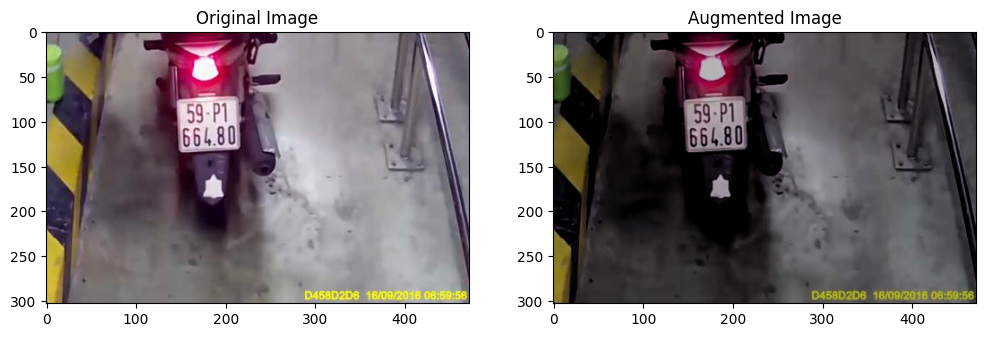

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(aug_image)
axes[1].set_title('Augmented Image')
plt.show()

#### Xoay ảnh

In [12]:
def rotate_image(image_path, output_path, range_angle):
    image = cv2.imread(image_path)
    angle = random.randint(-range_angle, range_angle)

    rotated_image = imutils.rotate(image, angle)
    cv2.imwrite(output_path, rotated_image)

In [13]:
original_image = cv2.imread('dataset/0000_00532_b.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
rotate_image(image_path='dataset/0000_00532_b.jpg', output_path='dataset/aug_5.jpg', range_angle=30)
aug_image = cv2.imread('dataset/aug_5.jpg')
aug_image = cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB)

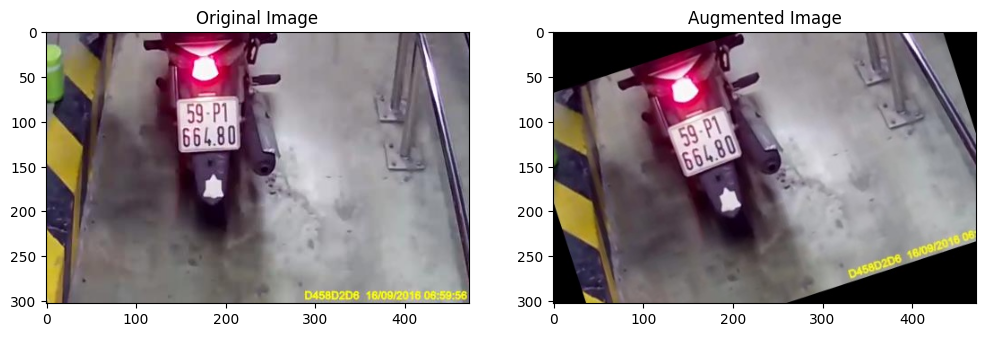

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(aug_image)
axes[1].set_title('Augmented Image')
plt.show()